# Stage -1 Data Wrangling

In [ ]:
# PROBLEM STATEMENT - GIVEN JSON'S ABOUT THE BUSINESS ATTRIBUTES, CUSTOMER REVIEWS AND TIPS CREATE A MODEL TO PREDICT THE 
# AVERAGE RATING GIVEN TO A RESTURANT IN THE YELP DATASET

# Downlaoding packages and fixing working Directories
import os
import json
import ast
from textblob import TextBlob
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#nltk.downloader.download('vader_lexicon')
import pandas as pd
import numpy as np

os.chdir('C:\Users\dhrugarg\Desktop\My Resume\Yelp')
os.getcwd()
os.listdir(os.getcwd())

In [ ]:
# Importing the tip json
inp_dat = []
with open('tip.json') as json_file: 
    for i in json_file:
        inp_dat.append(ast.literal_eval(i))
inp_dat

# # Importing the reviews data ~ 4gb 

# # Strategy taken - As the dataset is very big I have imported it row by row and appended it to two different lists that I have 
# # created below. This ensures we are not sticking it all into the memory at once and dont run into a memory error.
# # Further I have extracted all the useful info from the review text in the function below while importing it to output each
# #  review text's sentiment and length in the 'sent' list so that we dont need to download the whole text to a dataframe.
# # The other list 'review_dat' contains all the other variables except 'review text' from the reviews .

cnt = 0
sent = []
review_dat = []
for i in open('review.json'):
    
    txt = i[i.find('"text":')+7:i.find(',"useful":')]  # Extracting the review text
    txt_2= ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", txt).split()) # Removing unnencesary chars from the review text
                                                                                                 # before running sentiment analysis on it
    txt_sent = map(lambda x: round(x,2),list(TextBlob(txt_2).sentiment))  # Running sentiment analysis on the text 
    txt_sent.append(len(txt_2)) # Extracting length of each review
    sent.append(txt_sent)   # List with all reviews sentiment and length
    review_dat.append(i.replace(txt,'')) # Remaining review features
    
#sent - Contains review polarity/sentiment (-1,1) , subjectivity and length

# Importing the business json
bus_dat = []
with open('business.json') as json_file:
    for i in json_file:
        bus_dat.append(json.loads(i))

# Selecting only resturant businesses as thats what we are focusing on 
bus_dat_2 = []
for i in bus_dat:
    if 'restaurants' in map(lambda x: x.lower(),i['categories']):
        bus_dat_2.append(i)
bus_dat_2

In [599]:
#Further processing on the review json list to convert it to a pandas df

review_dat_t_2 = map(lambda x: x.replace('"text":,',''),review_dat)
print review_dat_t_2[0:2]
review_dat_t_3 = map(lambda x:ast.literal_eval(x),review_dat_t_2) # Converting from string rep to dictionary
print review_dat_t_3[0:2]
Reviews_1 = pd.DataFrame(review_dat_t_3)

# # Converting sentiment/review text analysis to a pandas df
sent_1 = pd.DataFrame(sent,columns = ['sentm_polarity','subjectivity','len'])
print 'Preview of 2 review DataFrames:'
print ''
print sent_1.head(5)

#Checking length of both should be same
print len(sent_1), len(Reviews_1), sent_1.index, Reviews_1.index
#5261669 5261669

#Creating final reviews file
Reviews_fnl = Reviews_1.merge(sent_1, how = 'inner', left_index = True, right_index = True)
Reviews_1.head(5)
# Backups just in case !
# sent_1.to_csv('sent.csv')
# Reviews_1.to_csv('Reviews.csv')

Preview of 2 review DataFrames:

   sentm_polarity  subjectivity  len
0            0.13          0.41  281
1            0.25          0.47  210
2            0.28          0.51  497
3            0.30          0.40  370
4            0.19          0.50  514


,Unnamed: 0,business_id,cool,date,funny,review_id,stars,useful,user_id
0,0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,0,bv2nCi5Qv5vroFiqKGopiw
1,1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,0,bv2nCi5Qv5vroFiqKGopiw
2,2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,0,bv2nCi5Qv5vroFiqKGopiw
3,3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,0,bv2nCi5Qv5vroFiqKGopiw
4,4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,0,bv2nCi5Qv5vroFiqKGopiw


In [600]:
# Combined Reviews data
Reviews_fnl.head(5)

,Unnamed: 0,business_id,cool,date,funny,review_id,stars,useful,user_id,sentm_polarity,subjectivity,len
0,0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,0,bv2nCi5Qv5vroFiqKGopiw,0.13,0.41,281
1,1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,0,bv2nCi5Qv5vroFiqKGopiw,0.25,0.47,210
2,2,VR6GpWIda3SfvPC-lg9H3w,0,2016-05-28,0,n6QzIUObkYshz4dz2QRJTw,5,0,bv2nCi5Qv5vroFiqKGopiw,0.28,0.51,497
3,3,CKC0-MOWMqoeWf6s-szl8g,0,2016-05-28,0,MV3CcKScW05u5LVfF6ok0g,5,0,bv2nCi5Qv5vroFiqKGopiw,0.30,0.40,370
4,4,ACFtxLv8pGrrxMm6EgjreA,0,2016-05-28,0,IXvOzsEMYtiJI0CARmj77Q,4,0,bv2nCi5Qv5vroFiqKGopiw,0.19,0.50,514


In [177]:
# Digging a little bit more in the sentiment ratings for the reviews (Inspecting the polarity !)

# Selecting some reviews with the highest polarity(positive) and some with the lowest polarity(negetive) 
# to see if they sound like the polarity given to them
sent_1['ind'] = sent_1.index
low_ind = map(lambda x: x + 1,sent_1.sort_values(by = ['sentm_polarity','ind']).index[0:4])  # Some low polarity
high_ind = map(lambda x: x + 1,sent_1.sort_values(by = ['sentm_polarity','ind'],ascending = [False,True]).index[5:9]) # Some high polarity

# Some cool examples for the review Sentiments #
print 'Checking wether the reviews with Low polarity are actually negetive'
print''
s = 1
for i in open('review.json'):
    if s in low_ind:
        print ast.literal_eval(i)['text']
    s +=1

print ''
print 'Checking wether the reviews with high polarity are actually positive'
print''
s = 1
for i in open('review.json'):
    if s in high_ind:
        print ast.literal_eval(i)['text']
    s +=1
# The reviews and polarities makes sense !

Checking wether the reviews with Low polarity are actually negetive

The worst experience ever they must have monkeys running this place sat in line for 20 minutes and did not move. I will not be using them ever you guys suck
Horrible experience. It took our table 2 hours to order, get our food and pay. My two tacos were oily and nothing to rave about. They even messed up my order, leaving out a side dish and charging for it. My water was never refilled.
I have never seen the ED restrooms this nasty. After waiting 3 +hours.. not a cleaning person around.
Absolutely horrible! If it wasn't for Vincent (I believe that is what his name was) I would be contacting Ch. 13 on this place.  Horrible customer service and over priced.

Checking wether the reviews with high polarity are actually positive

Awesome!  I'm from Los Angeles and it taste just like Tommy's.  The chili chesse burger is delicious
Best sandwiched in the Queen City. Try #6. Cash ony
Awesome turtle cheesecake cupcake. It was d

In [586]:
# Converting the tip data and business data to DF's
Tip_fnl = pd.DataFrame(inp_dat)
Bus_fnl = pd.DataFrame(bus_dat_2)
print 'Checking if there is 1 record per business or not'
print len(Bus_fnl) , len(Bus_fnl['business_id'].unique())   

Checking if there is 1 record per business or not
54618 54618


In [585]:
# Some more processing on the tip data

# Subsetting tip data for just restaurants
Tip_fnl2 = Bus_fnl[['business_id']].merge(Tip_fnl,on = ['business_id'],how = 'left')
print len(Tip_fnl2) , len(Tip_fnl)

# # Calculating the sentiment of the text using NLTLK this time for variety istead of using textblob
sent_an = SentimentIntensityAnalyzer()
Tip_fnl2['tip_polar'] = Tip_fnl2['text'].apply(lambda x: sent_an.polarity_scores(str(x))['pos'])
Tip_fnl2 = Tip_fnl2.iloc[:,Tip_fnl2.columns != 'text']

# Aggregating the tips data to a business_id level 
# Note :- Weighing the text_polarity by the no of likes received for that tip 
#tip_weigh_polar - Weighted average of text_polarity with weight being the no of likes for each business

Tip_fnl2.loc[Tip_fnl2['likes'].isnull(),'likes'] = 1  # Assuming missing likes as 0
Tip_fnl2['likes'] += 1   # Giving everyone a min of 1 for weighing

def weigh(df):   # Calculating weighted tip polarity and no of tips for each business 
    return pd.DataFrame([[(df['likes']*df['tip_polar']).sum()/df['likes'].sum(),len(df)]],
                        columns = ['tip_weigh_polar','no_tips'])

weig_df = Tip_fnl2.groupby('business_id')[['tip_polar','likes']].apply(weigh).reset_index()
weig_df = weig_df.iloc[:,weig_df.columns != 'level_1']
weig_df.head(5)

710667 1098325


,business_id,tip_weigh_polar,no_tips
0,--6MefnULPED_I942VcFNA,0.137308,13
1,--9e1ONYQuAa-CB_Rrw7Tw,0.263013,146
2,--DaPTJW3-tB1vP-PfdTEg,0.513333,3
3,--FBCX-N37CMYDfs790Bnw,0.271465,42
4,--GM_ORV2cYS-h38DSaCLw,0.318000,1


In [584]:
### Some more processing on the business data

# ANALYZING THE ATTRIBUTES VARIABLE

# Extracting attributes that could be useful predictors

# Dictionary with attributes, Percent of Businesses having attribute
def buss_atr(atr_sr):
    from collections import defaultdict
    d1 = defaultdict(int)
    for i in atr_sr:
        for j in i.keys():
            d1[j] +=1
    df = pd.DataFrame(d1.items(),columns = ['Attribute','Count'])
    df['Prcnt_buss_atr'] = (df['Count']/len(atr_sr))*100
    df.sort_values(['Prcnt_buss_having_atr'],ascending = False,inplace = True)
    return df

out = buss_atr(Bus_fnl['attributes'])
print 'Using the Table below to find possible useful Attribute Predictors'
print out[0:15]

# Based on looking at what % of the attributes are populated and what attributes would make sense as predictors to predict the
# star rating of a restaurant I chose the following as sensible predictors:
print ''
print ('Basically I choose all the top 8 attributes as they make business sense and also they pass a threshold of 85% for being populated')

# Extracting the top 8 attributes as df columns from the attribute dictionary
def extr_var(d1,i):
    if i in d1:
        return d1[i]
    else:
        return np.nan
    
for i in list(out['Attribute'][0:8]):
    Bus_fnl[i] = Bus_fnl['attributes'].apply(extr_var,args = (i,))

# Removing redundant columns pre modelling
cols = ['address','attributes','categories','hours','name']
Bus_fnl = Bus_fnl.iloc[:,list(~pd.Series(Bus_fnl.columns).isin(cols))] 
# print 'Processed Business Data Set:'
print('')
print 'Final processed Business Json with attribute predictors'
Bus_fnl.head(5)

Using the Table below to find possible useful Attribute Predictors
                     Attribute  Count  Prcnt_buss_atr
27      RestaurantsPriceRange2  49455       90.547072
19          RestaurantsTakeOut  48829       89.400930
10    RestaurantsGoodForGroups  48120       88.102823
20                 GoodForKids  47500       86.967666
6   BusinessAcceptsCreditCards  47233       86.478817
14     RestaurantsReservations  46987       86.028416
4            RestaurantsAttire  46691       85.486470
29         RestaurantsDelivery  46663       85.435205
25              OutdoorSeating  45929       84.091325
32                 GoodForMeal  44499       81.473141
33             BusinessParking  44075       80.696840
2                        HasTV  42235       77.327987
1                      Alcohol  41982       76.864770
8                     Ambience  41790       76.513237
24     RestaurantsTableService  41623       76.207477

Basically I choose all the top 8 attributes as they make business se

,business_id,city,is_open,latitude,longitude,neighborhood,postal_code,review_count,stars,state,RestaurantsPriceRange2,RestaurantsTakeOut,RestaurantsGoodForGroups,GoodForKids,BusinessAcceptsCreditCards,RestaurantsReservations,RestaurantsAttire,RestaurantsDelivery
0,PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,1,41.119535,-81.475690,,44221,116,3.5,OH,2.0,True,True,True,True,False,casual,False
1,o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,1,48.727200,9.147950,,70567,5,4.0,BW,3.0,False,True,True,True,True,dressy,False
2,XOSRcvtaKc_Q5H1SAzN20A,Houston,0,40.241548,-80.212815,,15342,3,4.5,PA,1.0,True,True,True,True,True,casual,False
3,fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,1,35.221647,-80.839345,Uptown,28202,7,3.5,NC,1.0,True,True,True,True,False,casual,False
4,l09JfMeQ6ynYs5MCJtrcmQ,Toronto,0,43.711399,-79.399339,Yonge and Eglinton,M4P 2H6,12,3.0,ON,3.0,True,False,False,True,True,casual,False


In [282]:
# CREATING PREDICTORS FROM THE REVIEW VARIABLES

# Creating the following synthetics:
# 1. weighted sentiment polarity and subjectivity based on usefulness of a review
# 2. Avg no of cool reviews for a place
# 3. Avg no of funny reviews for a place

# Calculating weighted sentiment polarity and subjectivity and avg no of cool and funny reviews for each business 

Reviews_fnl['useful'] +=1  # To give everyone a base weight of one

def weigh_2(df):   
    return pd.DataFrame([[(df['useful']*df['sentm_polarity']).sum()/df['useful'].sum(),  # Creating these predictor for 
                          (df['useful']*df['subjectivity']).sum()/df['useful'].sum(),    # each group of the business id
                          df['funny'].sum()/len(df),
                          ,float(df['cool'].sum()/len(df)),len(df)]],  
                        columns = ['weigh_revw_sent','weigh_revw_subj','Avg_no_funny_revw','Avg_no_cool_revw','no_rev'])

# Applying thr group function created above
weig_dfx = Reviews_fnl.groupby('business_id')[['cool','funny','useful',
                                              'sentm_polarity','subjectivity']].apply(weigh_2).reset_index() 

Reviews_fnl2 = weig_dfx.iloc[:,weig_dfx.columns != 'level_1']  # Removing the redundant variable
Reviews_fnl2.head(5)

,business_id,weigh_revw_sent,weigh_revw_subj,Avg_no_funny_revw,Avg_no_cool_revw
0,--6MefnULPED_I942VcFNA,0.152644,0.502069,0,0
1,--7zmmkVg-IMGaXbuVd0SQ,0.236116,0.577107,0,1
2,--8LPVSo5i0Oo61X01sV9A,0.321667,0.624167,0,0
3,--9QQLMTbFzLJ_oT-ON3Xw,0.188421,0.556316,0,0


In [552]:
# Merging the Business, Reviews and Tips table to create modelling set

Mod_set1 = Bus_fn2.merge(weig_df,on = 'business_id',how = 'left')
Mod_set2 = Mod_set1.merge(Reviews_fnl2,on = 'business_id',how = 'left')
print 'Final modelling set'
Mod_set2.head(5)

Final modelling set


,business_id,city,is_open,latitude,longitude,neighborhood,postal_code,review_count,stars,state,...,BusinessAcceptsCreditCards,RestaurantsReservations,RestaurantsAttire,RestaurantsDelivery,tip_weigh_polar,no_tips,weigh_revw_sent,weigh_revw_subj,Avg_no_funny_revw,Avg_no_cool_revw
0,PfOCPjBrlQAnz__NXj9h_w,Cuyahoga Falls,1,41.119535,-81.475690,NaN,44221,116,3.5,OH,...,True,False,casual,False,0.372000,17,0.188995,0.563158,0,0
1,o9eMRCWt5PkpLDE0gOPtcQ,Stuttgart,1,48.727200,9.147950,NaN,70567,5,4.0,BW,...,True,True,dressy,False,0.000000,1,0.000000,0.000000,0,0
2,XOSRcvtaKc_Q5H1SAzN20A,Houston,0,40.241548,-80.212815,NaN,15342,3,4.5,PA,...,True,True,casual,False,0.000000,1,0.358333,0.618333,0,0
3,fNMVV_ZX7CJSDWQGdOM8Nw,Charlotte,1,35.221647,-80.839345,Uptown,28202,7,3.5,NC,...,True,False,casual,False,0.246667,3,0.194167,0.540833,0,0
4,l09JfMeQ6ynYs5MCJtrcmQ,Toronto,0,43.711399,-79.399339,Yonge and Eglinton,M4P 2H6,12,3.0,ON,...,True,True,casual,False,0.000000,1,0.217838,0.560270,0,1


# STAGE - 2 PRE MODELLING PREPERATION

In [553]:
# CREATING SEPERATE TEST SET WHICH WE WONT TOUCH Note : Creating this before imputing the missing values as the test set should
# not be biased becaused of imputation (data leakage)

from sklearn.model_selection import train_test_split

# Making nulls uniform and removing any other redundant variables
Mod_set2 = Mod_set2.applymap(lambda x: np.nan if x == '' else x)  
Mod_set2 = Mod_set2.drop(['business_id'],axis = 1)

# Creating independent/depenedent variables 
X = Mod_set2.drop(['stars'],axis = 1)
y = Mod_set2[['stars']]

# Replacing nan's with 'miss' keyword
for i in X.columns:
    X.loc[X[i].isnull(),i] = 'miss'

# Breaking up into train test  set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
print len(X_train) , len(X_test)
# 40963 13655

40963 13655


In [579]:
# TAKING CARE OF MISSING VALUES 

# Looking at the missing value count for variables in the train test
print 'Percent missing in each Predictors'
from __future__ import division
((X_train.apply(lambda x: round(x[x =='miss'].count()/len(x),3)))*100).sort_values(ascending = False)[:11]

# Removing neighborhood from both test and train as it has over 45 % values as missing
X_train = X_train.iloc[:,X_train.columns!='neighborhood'] 
X_test = X_test.iloc[:,X_test.columns!='neighborhood'] 

# Looking at all the above 9 variables that need to be imputed - we can see that they are all categorical hence   
# creating a sepearte category for these nulls in the label encoder below and treating them as a sperate category
# as any mean/median imputation doen't make sense for them.

Percent missing in each Predictors


neighborhood                  55.1
RestaurantsDelivery           14.7
RestaurantsAttire             14.6
RestaurantsReservations       13.9
BusinessAcceptsCreditCards    13.6
GoodForKids                   13.1
RestaurantsGoodForGroups      11.9
RestaurantsTakeOut            10.6
RestaurantsPriceRange2         9.6
postal_code                    0.2
review_count                   0.0
dtype: float64

In [411]:
# Label encoding the categorical variables to abide with sklearn model standards 
# and scaling Predictors for quick algo convergence
from collections import defaultdict
from sklearn import preprocessing

cat = X_train.dtypes[X_train.dtypes == 'object'].index # Listing all categorical variables (non int/float types) to create encoder

# Encoding the categorical variables :
enc = defaultdict(preprocessing.LabelEncoder)    # Creating a default dict of label encoders to remember each label 
                                                 #  for inverse transform later/ or for when we are scoring new data
for i in cat:
    enc[i].fit(X[i])
    X_train[i] = enc[i].transform(X_train[i])
    X_test[i] = enc[i].transform(X_test[i])

# Scaling the X variables for train set        
sc = preprocessing.StandardScaler().fit(X_train)
X_train_scl = sc.transform(X_train)

# STAGE 3 - CREATING AND CHOSING THE MODELS

In [604]:
# Building the models 

# As this is a regression task - predicting ratings scale (1-5) we would be using some form of regression
# Using ensemble techniques makes sense here - 
# Random Forest regressor and Gradient Boosting Regressor as the given the nature of the predictors both 
# continous and discrete(with very high arity) it makes sense to use tree based regression approaches. 

# Note : - I am using a Random Forest regressor for demonstration purposes here but we could loop in and add a GBR to this process
# very easily using this code and then find optimum hyper parameters for it too and pick up the model & parameters which reduces
# the MSE on the test set by maximum

from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import operator

#Performing Random search hyper paramater tuning 
# Note: - As a next step we could do Grid search for the points near the one point picked by Random Search for more fine tuning

#Tuning the following parameters for the tree based approaches:

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 60, num = 11)] # Maximum number of levels in tree
min_samples_split = [2, 3, 5] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor(random_state = 40)
# Randomly selecting parameters from the list above for 10 random iterations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = parameters, # 4 fold cv
                               n_iter = 10, cv = 4, verbose=2, random_state=5)
rf_random.fit(X_train_scl,y_train)

print 'Printing parameters for the best performing model'
print ''
for i in rf_random.best_params_.items():  # Selecting best performing model
    print i
print ('')
#Base model without random search
base_model = RandomForestRegressor(random_state = 34)
base_model.fit(X_train_scl, y_train)

#Comparing base model accuracy vs result from Random Search HP tuning on the test set
error_hyper = mean_squared_error(y_test, rf_random.best_estimator_.predict(sc.transform(X_test)))
error_base = mean_squared_error(y_test, base_model.predict(sc.transform(X_test)))

print 'The MSE for the tuned model on the test set is {:.3f} while the MSE for \
the base model on the test set is {:.3f}'.format(error_hyper,error_base)
print ''
print 'Using hyper paramter tuning we are able to reduce the MSE by {:.2f} percent'.format(((error_base-error_hyper)/error_base)*100)

Printing parameters for the best performing model

('bootstrap', False)
('min_samples_leaf', 4)
('n_estimators', 70)
('max_features', 'sqrt')
('min_samples_split', 3)
('max_depth', 27)

The MSE for the tuned model on the test set is 0.249 while the MSE for the base model on the test set is 0.276

Using hyper paramter tuning we are able to reduce the MSE by 9.80 percent


# STAGE - 4 ANALYZING FINAL MODEL/PREDICTORS PERFORMANCE

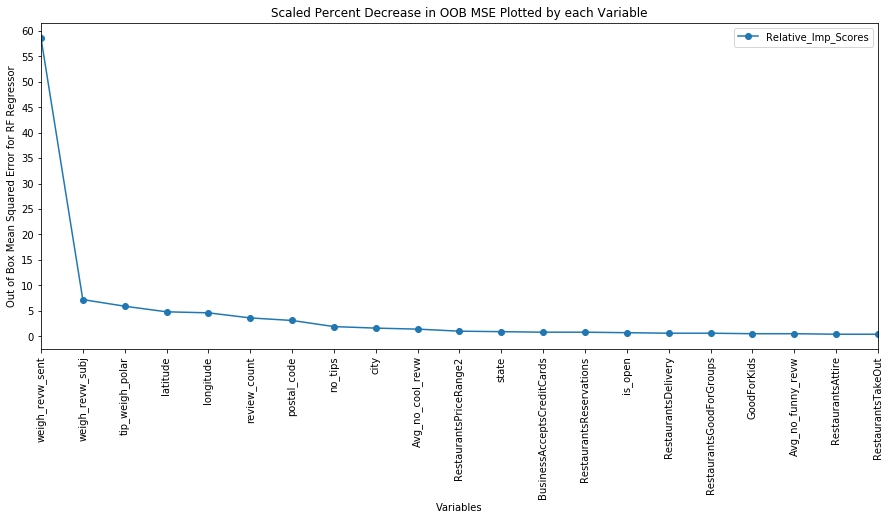

Text(0,0.5,u'Out of Box Mean Squared Error for RF Regressor')

In [538]:
# Doing some analysis to understand the top predictive variables for the final RF model 

# This will help us answer questions like :
# Are the text variables polarity/subjectivity of reviews really important predictors
# Are the sentiments/text of the tip's more important or that of of reviews. We could approprietly incentivize people to leave 
# more of whichever of these two is important
# Are there any other surprising variables such as avg funny votes or say resturant attire that are important predictors

# Analyzing the variable impt scores for the final model that we chose 
print "Variable Importance for selected RF model"
coeff = rf_random.best_estimator_.feature_importances_.flatten().tolist()
coeff = map(abs,coeff)
coeff_dict={}
for i in range(len(coeff)):
    coeff_dict[X_train.columns[i]]=round(coeff[i],3)
sorted_coeff_dict = sorted(coeff_dict.items(),key=operator.itemgetter((1)),reverse=True)
for x in sorted_coeff_dict:
    print x

# Plotting the variable importance scores 

imp_scores = pd.DataFrame(sorted_coeff_dict, columns = ['Variables','Importance_Score'])
imp_scores['Relative_Imp_Scores'] = (imp_scores['Importance_Score']/imp_scores['Importance_Score'].sum())*100

import matplotlib.pyplot as plt
plt.show()
imp_scores.plot(x = ['Variables'],y = ['Relative_Imp_Scores'],figsize=(15, 6),
                title='Scaled Percent Decrease in OOB MSE Plotted by each Variable',marker='o')

plt.yticks(np.arange(0,65,5))
plt.xticks(range(len(imp_scores['Variables'])),imp_scores['Variables'])
plt.xticks(rotation=90)
plt.ylabel('Out of Box Mean Squared Error for RF Regressor')

# Important conclusions:

# As expected the most predictive variable is the 'Weighted sentiment of the reviews'. It is roughly 8 times more important 
# than the next predictor which as expected is again the 'subjectivity of the review' followed by the 'sentiment of the tips'.

# Surprisingly the latitude and longitude variables came out to be the next important leading us to form a hypothesis that 
# resturants of a similar rating may be clubbed together. 

# Finally none of the resturant attributes such as Open/Close or accepts reservation/delivery came out to be important. This was
# kind of expected as they may not be that directly related to the review rating and also dont offer the level of granularity
# as offered by the review/tip sentiment. Also avg cool/funny reviews also did not come out to be that important as I expected.

In [606]:
How much better is the model than the default model (Bottom Line)

MSE if we predicted the mean of the ratings (Default model):
Mse_default = ((y_test - y_train.mean())**2).sum()/len(y_test)
MSE_model = error_hyper
print 'PERFORMANCE CONCLUSION'
print ''
Prcnt_reduction_MSE = ((Mse_default[0] - MSE_model)/Mse_default[0])*100
print 'The model created was able to reduce the MSE by: %d percnt more on the test set \
compared to the default model' %(Prcnt_reduction_MSE)

print 'Ie. we decreased the MSE from {:.3f} to {:.3f}'.format(Mse_default[0],MSE_model)

PERFORMANCE CONCLUSION

The model created was able to reduce the MSE by: 59 percnt more on the test set compared to the default model
Ie. we decreased the MSE from 0.620 to 0.249
